# Objective Project

**Objective:**

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


**Tentang Organisasi:**

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

**Permasalahan:**

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, kita ditugaskan untuk mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

**Penjelasan kolom fitur:**

Negara : Nama negara

Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran

Ekspor : Ekspor barang dan jasa perkapita

Kesehatan: Total pengeluaran kesehatan perkapita

Impor: Impor barang dan jasa perkapita

Pendapatan: Penghasilan bersih perorang

Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 

Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama

Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama

GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

# Library Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Membaca Data Set

In [ ]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Exploratory Data Analysis

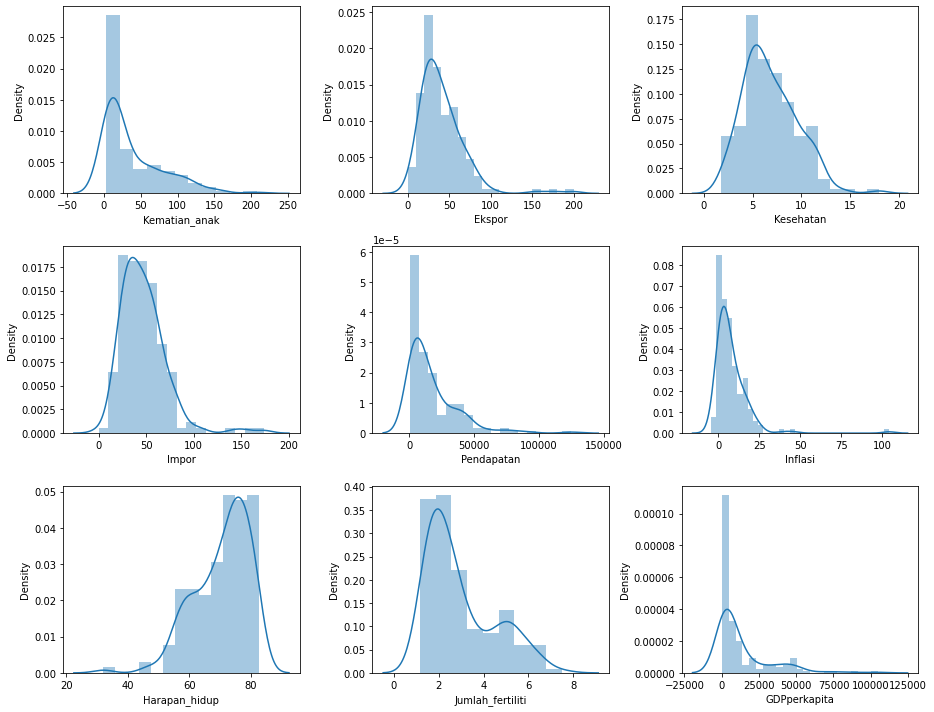

In [ ]:
plt.figure(figsize=(13,10))
for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

*   Data memiliki 6 parameter dan sampel populasi berjumlah 166 Negara
*   Adanya skew pada beberapa grafik feature menunjukkan distribusi dari data berpusat pada modusnya, artinya sebaran sampel seperti pada feature kematian anak, pendapatan, GDP perkapita, dan jumlah fertiliti berpusat dominan pada nilai yang rendah, sedangkan pada feature harapan hidup berpusat dominan pada nilai yang tinggi


Selanjutnya tindak lanjut visualisasi korelasi antar feature dan sebaran feature dilakukan untuk melihat gambaran sebaran dari feature data

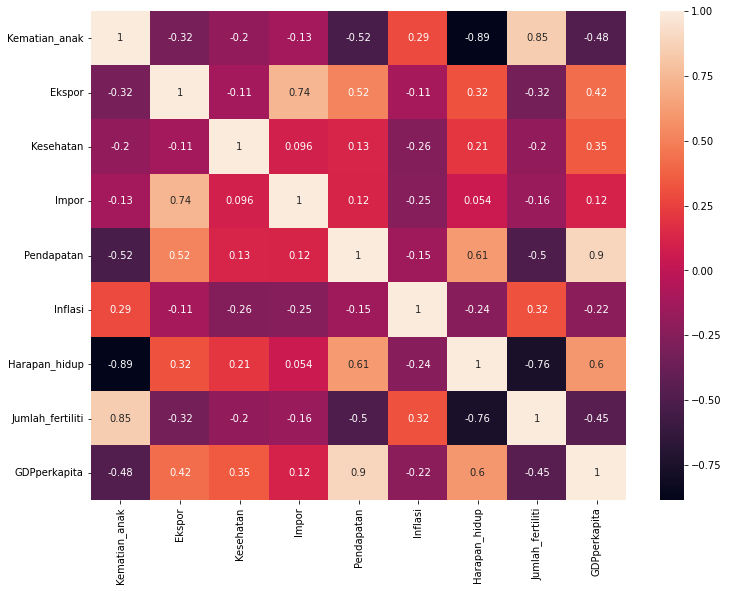

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
#plt.savefig('Multivariate_Analysis.png')
plt.show()

*   Visualisasi korelasi antar feature menunjukkan adanya beberapa feature yang saling berhubungan kuat yakni antara pendapatan terhadap gdp (dengan nilai 0.9), harapan hidup terhadap kematian anak (dengan nilai -0.89), jumlah fertiliti terhadap kematian anak (dengan nilai 0.85). Nilai positif pada korelasi menunjukkan hubungan sebanding, sedangkan nilai negatif menunjukkan hubungan terbalik.

*   Nilai berkorelasi kuat ini dapat digunakan untuk membantu kita dalam klasterisasi

*   Berdasarkan nilai korelasi dan bentuk tipe data pada feature pendapatan dan GDP dapat digunakan sebagai indikator dari faktor ekonomi. Sedangkan berdasarkan nilai korelasi dan bentuk tipe data pada feature kematian anak, harapan hidup, dan jumlah fertiliti dapat digunakan sebagai indikator dari faktor kesehatan.

Diharapkan dengan adanya bantuan dana selain dapat meningkatkan faktor ekonomi, juga meningkatkan kesehatan. Dan apabila kedua faktor ini terpenuhi akan meningkatkan kesejahteran sosial. 





# Outlier Treatment

Selanjutnya pada tahap data preprocessing dilakukan pengecheckan dan penghapusan data pencilan dari feature pendapatan dan GDP perkapita, dikarenakan pada kedua feature ini sebaran data bernilai tingginya (pencilan) akan mempengaruhi pemodelan klasterisasi, dan juga apabila data pencilan ini dihilangkan akan mempermudah dalam mencapai objective dari project pengerjaan.

Outlier


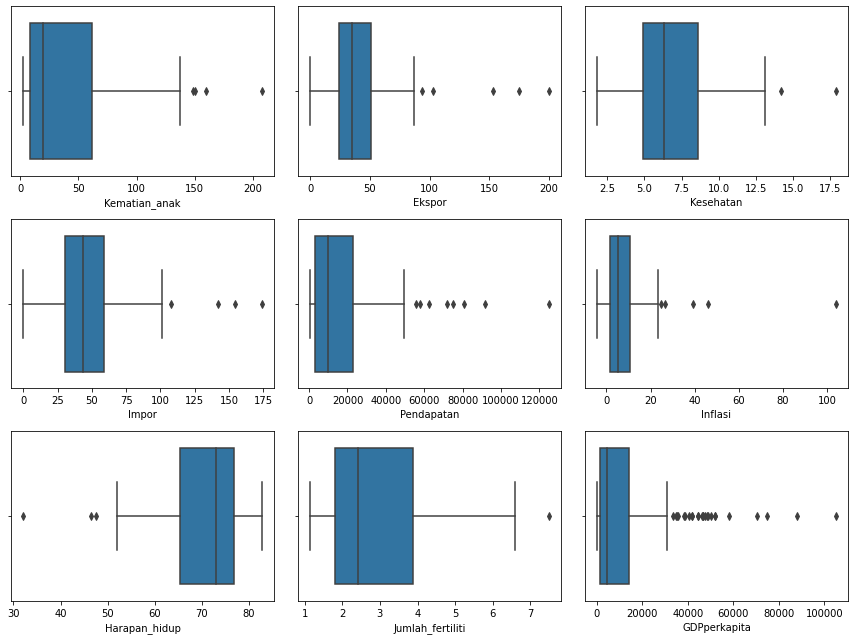

In [ ]:
#checking outlier data

print('Outlier')
plt.figure(figsize=(12,9))
for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.boxplot(df[i[1]])
plt.tight_layout()
plt.show()


In [ ]:
def handling_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  Lb = Q1 - (IQR*1.5)
  Ub = Q3 + (IQR*1.5)
  return df[(df>Lb)&(df<Ub)]

In [ ]:
data = handling_outlier(df[['Pendapatan','GDPperkapita']]).dropna(axis=0)

In [ ]:
data = pd.merge(df,data, how='inner')
print(data.shape)
print(df.shape)

(142, 10)
(167, 10)


In [ ]:
data.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,44.112676,37.970415,6.424014,46.598351,10935.65493,8.599683,68.806338,3.149014,6340.943662
std,41.038923,21.839432,2.369044,21.142601,9895.15270,11.112812,8.490539,1.553241,7110.006849
min,3.200000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,13.900000,22.800000,4.872500,31.325000,2715.00000,2.342500,62.825000,1.890000,1205.000000
50%,26.300000,33.050000,5.990000,44.100000,7940.00000,5.935000,70.450000,2.630000,3575.000000
75%,63.850000,50.200000,7.887500,58.825000,16150.00000,11.975000,75.475000,4.475000,8637.500000
max,208.000000,153.000000,14.200000,154.000000,45400.00000,104.000000,81.900000,7.490000,30800.000000


Banyaknya negara setelah feature data telah selesai di treatment berjumlah 142 negara. Selanjutnya dibutuhkan penyamaan skala nilai pada feature sebelum pemodelan klasterisasi dilakukan

# Scalling Data

Perbandingan skala dilakukan menggunakan metode StandardScaler dengan menambahkan kolom-kolom baru

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[['Kematian_anak_T','Ekspor_T','Kesehatan_T','Impor_T','Pendapatan_T','Inflasi_T','Harapan_hidup_T', 'Jumlah_fertiliti_T', 'GDPperkapita_T']] = sc.fit_transform(data[['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan','Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']])
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Kematian_anak_T,Ekspor_T,Kesehatan_T,Impor_T,Pendapatan_T,Inflasi_T,Harapan_hidup_T,Jumlah_fertiliti_T,GDPperkapita_T
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.126990,-1.285264,0.489682,-0.080613,-0.945783,0.075885,-1.490007,1.725709,-0.816938
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.672778,-0.458149,0.053368,0.095009,-0.101991,-0.371124,0.885714,-0.968504,-0.317709
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.411127,0.019740,-0.954812,-0.721394,0.199219,0.677314,0.909353,-0.167348,-0.265485
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.831247,1.117964,-1.513971,-0.175543,-0.510703,1.246234,-1.029046,1.945381,-0.396750
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.826834,0.345991,-0.166906,0.583901,0.828006,-0.646553,0.944811,-0.658379,0.826975


# Clustering (KMeans)

Pada pemodelan klasterisasi yang akan dilakukan menggunakan KMeans. Feature kematian anak dan harapan hidup negara dipilih dengan alasan agar sesuai dengan objective perusahaan untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam. Dimana hal ini mengacu kepada analisis penyebab sebaran nilai kematian anak dan harapan hidup rendah atau tinggi terjadi, agar bantuan dana dapat tepat sasaran.

Terlebih dahulu penentuan jumlah klasterisasi akan menggunakan metode elbow graph untuk mempermudah pemilihan terjadi lebih optimal.

Elbow graph


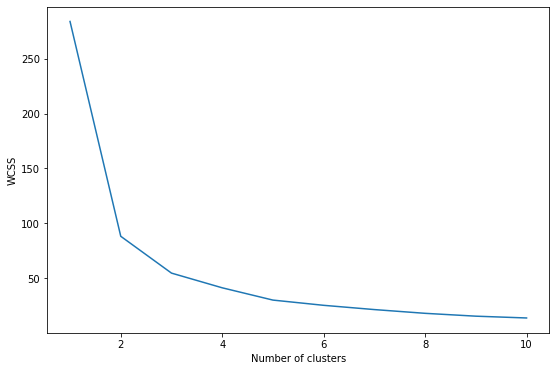

In [ ]:
from sklearn.cluster import KMeans

print('Elbow graph')
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(data[['Kematian_anak_T', 'Harapan_hidup_T']])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Penggunaan grafik visualisasi elbow menunjukkan saat setelah nilai n cluster = 3 garis grafik tidak menunjukkan titik patah yang memiliki arti tidak terdapat perubahan nilai yang signifikan. oleh karena itu banyaknya cluster yang akan diambil adalah 3 klaster.

In [ ]:
#Modeling
kmeans = KMeans(n_clusters = 3, random_state=30)
kmeans.fit(data[['Kematian_anak_T','Harapan_hidup_T']])
labels1 = kmeans.labels_
data['labels_KaH'] = labels1

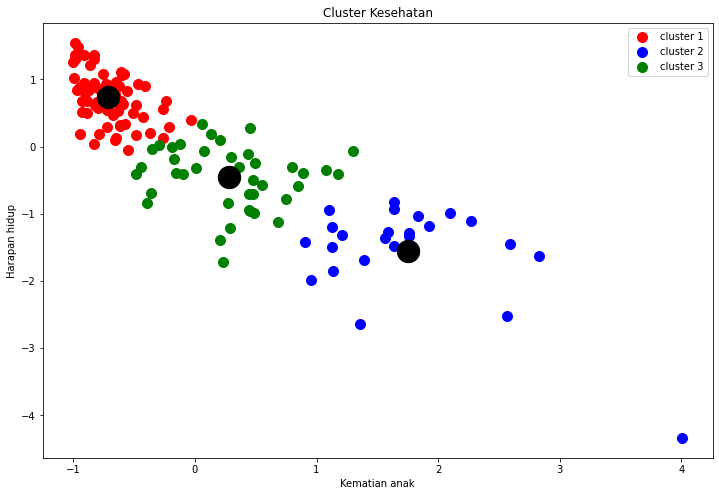

In [ ]:
#visualisasi & clustering k=3

plt.figure(figsize=(12,8))
plt.scatter(data['Kematian_anak_T'][data.labels_KaH == 0], data['Harapan_hidup_T'][data.labels_KaH == 0], c = 'red', label='cluster 1', s=100)
plt.scatter(data['Kematian_anak_T'][data.labels_KaH == 1], data['Harapan_hidup_T'][data.labels_KaH == 1], c = 'blue', label='cluster 2', s=100)
plt.scatter(data['Kematian_anak_T'][data.labels_KaH == 2], data['Harapan_hidup_T'][data.labels_KaH == 2], c = 'green', label='cluster 3', s=100)

centeroid = kmeans.cluster_centers_
plt.scatter(centeroid[:,0], centeroid[:,1], c='black', s=500)

plt.legend()
plt.title('Cluster Kesehatan')
plt.xlabel('Kematian anak')
plt.ylabel('Harapan hidup')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=30)
kmeans.fit(data[['Kematian_anak_T','Harapan_hidup_T']])
labels2 = kmeans.labels_

kmeans = KMeans(n_clusters = 2, random_state=30)
kmeans.fit(data[['Kematian_anak_T','Harapan_hidup_T']])
labels3 = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data[['Kematian_anak_T','Harapan_hidup_T']], labels= labels1))
print(silhouette_score(data[['Kematian_anak_T','Harapan_hidup_T']], labels= labels2))
print(silhouette_score(data[['Kematian_anak_T','Harapan_hidup_T']], labels= labels3))

0.5391848476872811
0.5407630364870764
0.6249049619360916


Hasil metric dari pemodelan menunjukkan bahwa nilai pengelompok (n Cluster) = 3 lebih baik karena sudah tidak menunjukkan perbedaan nilai yang secara signifikan terhadap n cluster = 4.

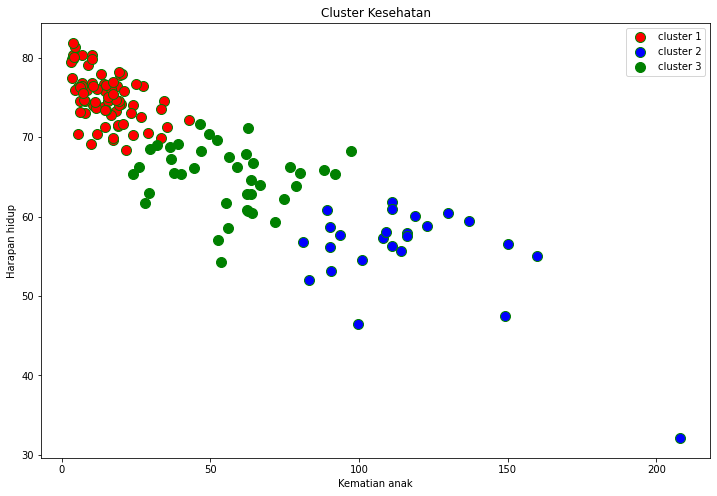

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data['Kematian_anak'][data.labels_KaH == 0], data['Harapan_hidup'][data.labels_KaH == 0], c = 'red', label='cluster 1', s=100, edgecolors='green')
plt.scatter(data['Kematian_anak'][data.labels_KaH == 1], data['Harapan_hidup'][data.labels_KaH == 1], c = 'blue', label='cluster 2', s=100, edgecolors='green')
plt.scatter(data['Kematian_anak'][data.labels_KaH == 2], data['Harapan_hidup'][data.labels_KaH == 2], c = 'green', label='cluster 3', s=100, edgecolors='green')

plt.legend()
plt.title('Cluster Kesehatan')
plt.xlabel('Kematian anak')
plt.ylabel('Harapan hidup')
plt.show()

Pemodelan menunjukkan:
1. Klaster 1 (merah) merupakan klasterisasi dari kematian anak bernilai rendah dan harapan hidup tinggi
2. Klaster 2 (biru) merupakan klasterisasi dari kematian anak bernilai tinggi dan harapan hidup rendah
3. Klaster 3 (hijau) merupakan klasterisasi dari kematian anak bernilai sedang dan harapan hidup sedang  



# Analisis

Analisa lebih lanjut akan memilih negara-negara yang berada pada klaster 2 yaitu klaster dengan sebaran nilai kematian anak yang tinggi dan nilai harapan hidup yang rendah.

In [ ]:
#data
klaster1 = data[data['labels_KaH'] == 0]
klaster1.reset_index(drop='index', inplace=True)

klaster2 = data[data['labels_KaH'] == 1]
klaster2.reset_index(drop='index', inplace=True)

klaster3 = data[data['labels_KaH'] == 2]
klaster3.reset_index(drop='index', inplace=True)

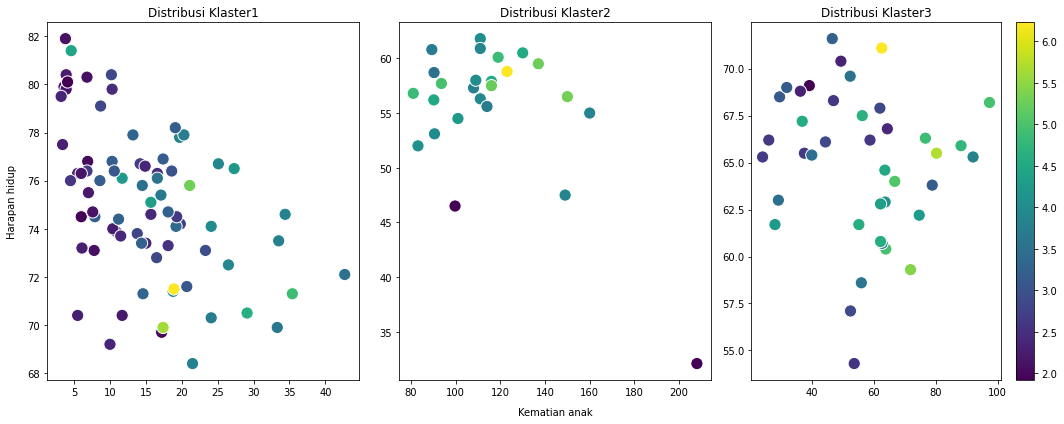

In [ ]:
import numpy as np

plt.figure(figsize=(15,6))

for i in range(len(np.unique(data['labels_KaH']))):
  plt.subplot(1,3,i+1)
  plt.scatter(data['Kematian_anak'][data.labels_KaH == i], data['Harapan_hidup'][data.labels_KaH == i], c=data['Jumlah_fertiliti'][data.labels_KaH == i], s=150, edgecolors='white')
  plt.title(f'Distribusi Klaster{i+1}')
  if i == 1:
    plt.xlabel('Kematian anak', labelpad=10)
  elif i == 0:
    plt.ylabel('Harapan hidup', labelpad=10)

plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
print(f'Jumlah Negara pada Klaster 2 sebanyak {klaster2.shape[0]} Negara')

Jumlah Negara pada Klaster 2 sebanyak 25 Negara


Jika dilihat distribusi jumlah fertiliti (yang divisualisasikan dengan warna) bernilai tinggi lebih dominan tersebar pada klaster 2 (klaster dengan kematian anak yang tinggi dan harapan hidup rendah), hal ini mengindikasikan jumlah populasi di negara pada klaster 2 tergolong rendah diakibatkan nilai kematian anak yang tinggi. Dan faktor dari nilai kematian anak yang tinggi ini bisa diakibatkan oleh nilai faktor ekonomi dan kesehatan rendah, ataupun adanya bencana alam.

In [ ]:
kandidat = klaster2.sort_values('GDPperkapita', ascending=True).head(5)
kandidat = kandidat.drop(columns=['Kematian_anak_T','Ekspor_T','Kesehatan_T','Impor_T','Pendapatan_T','Inflasi_T','Harapan_hidup_T', 'Jumlah_fertiliti_T', 'GDPperkapita_T','labels_KaH'], axis=0)
kandidat = kandidat.set_index('Negara')
kandidat

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


Apabila negara pada klaster 2 ini diurutkan berdasarkan nilai perekonomian yang dilihat dari GDP perkapitanya diperoleh hasil 5 Negara dengan nilai GDP perkapita yang rendah (seperti tampak pada tabel) yaitu:
1. Burundi,
2. Liberia,
3. Congo,
4. Niger, dan
5. Sierra.

Negara berpopulasi rendah akibat kematian anak yang tinggi dengan nilai perekonomian rendah dapat dikatakan merupakan salah satu kondisi buruk bagi negara tersebut.

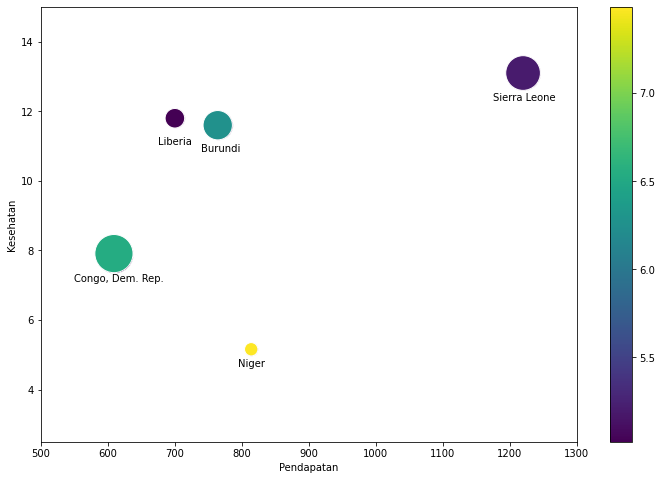

In [ ]:
plt.figure(figsize=(12,8))

cmap = []

for i in kandidat.index:
  plt.scatter(x=kandidat.loc[i]['Pendapatan'], y=kandidat.loc[i]['Kesehatan'], c=kandidat.loc[i]['Jumlah_fertiliti'], s=(kandidat.loc[i]['Inflasi'])*70, edgecolors='white')
  c = kandidat.loc[i]['Jumlah_fertiliti']
  cmap.append(c)
  if i == 'Niger':
    plt.annotate(s=i, xy=((kandidat.loc[i]['Pendapatan'] - 20), (kandidat.loc[i]['Kesehatan'] - 0.5)))
  elif i == 'Sierra Leone':
    plt.annotate(s=i, xy=((kandidat.loc[i]['Pendapatan'] - 45), (kandidat.loc[i]['Kesehatan'] - 0.8)))
  elif i == 'Congo, Dem. Rep.':
    plt.annotate(s=i, xy=((kandidat.loc[i]['Pendapatan'] - 60), (kandidat.loc[i]['Kesehatan'] - 0.8)))
  else:
    plt.annotate(s=i, xy=((kandidat.loc[i]['Pendapatan'] - 25), (kandidat.loc[i]['Kesehatan'] - 0.75)))

plt.ylim(2.5,15)
plt.xlim(500, 1300)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.colorbar(plt.scatter(x=kandidat['Pendapatan'], y=kandidat['Kesehatan'], c=cmap, s=(kandidat['Inflasi'])*70, edgecolors='white'))
plt.show()

*   Lebih lanjut berdasarkan plot grafik visual dari tinggi atau rendahnya nilai pendapatan terhadap pengeluaran kesehatan perkapita memberikan gambaran akan keadaan ekonomi masyarakat di negara tersebut dalam menangani kesehatan di negaranya:
Apabila nilai pengeluaran kesehatan perkapita semakin tinggi dibandingkan pendapatan yang diperoleh (saat nilai GDP perkapita negara tersebut rendah) negara tersebut dapat dikatakan sedang memiliki kesusahan dalam faktor ekonomi untuk dapat meningkatkan kesehatan di Negaranya. Namun kondisi ini dapat diperburuk lagi apabila keadaan ekonomi negara tersebut sedang mengalami kondisi inflasi disaat pengeluaran kesehatan perkapita bernilai tinggi.

*   Secara visulasisasi meskipun jumlah fertiliti (yang divisualisasikan dengan warna) pada klaster 2 tergolong tinggi, namun jika diantara ke-5 negara ini dibandingkan terdapat 2 negara yang rendah (Sierra, Liberia) dan 3 negara yang tinggi (Congo, Brundi, Niger). Sedangkan apabila dilihat dari besarnya nilai inflasi (yang divisualisasikan dengan ukuran lingkaran) pada ke-5 negara terdapat 3 negara yang perekonomiannya sedang mengalami inflasi tergolong tinggi (Congo, Burundi, Sierra).

Oleh karena keadaan ini negara Congo dan Burundi cukup menjadi sorotan didalam hasil analisis sebagai kandidat untuk penerima bantuan.

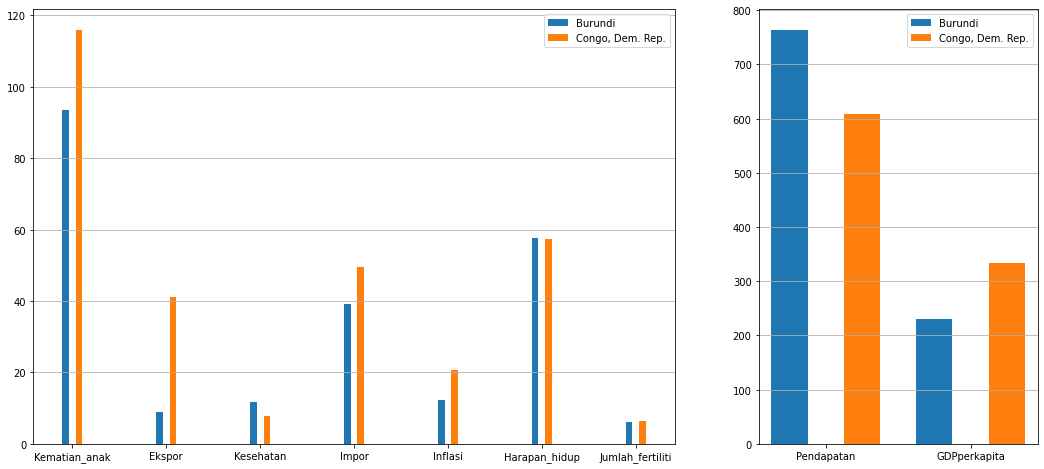

In [ ]:
feature = kandidat.drop(columns=['Pendapatan','GDPperkapita'])
feature2 = pd.DataFrame(data=kandidat, columns=['Pendapatan','GDPperkapita'])

grid = plt.GridSpec(1, 3, wspace=0.3, hspace = 0.3)

plt.figure(figsize=(18,8))

x = np.arange(0,49,7)
z = np.arange(0,4,2)
width = 0.5

plt.subplot(grid[0, :2])
for i,j in enumerate(feature.T.columns):
  if j == 'Burundi' or j == 'Congo, Dem. Rep.':
    plt.bar(x+(i*width), feature.T[j], width, label=j)
  else:
    pass
plt.xticks(x+0.5, labels=feature.columns)
plt.legend(loc='upper right')
plt.grid(axis='y')

plt.subplot(grid[0, 2])
for i,j in enumerate(feature2.T):
  if j == 'Burundi' or j == 'Congo, Dem. Rep.':
    plt.bar(z+(i*width), feature2.T[j], width, label=j)
  else:
    pass
plt.xticks(z+0.5, labels=feature2.columns)
plt.legend(loc='upper right')
plt.grid(axis='y')

plt.show()

Tinjauan lebih lanjut terhadap negara kandidat yakni Burundi dan Congo, dengan melihat:
*   Nilai Impor yang lebih tinggi dibandingkan Ekspor, hal ini menjadi salah satu faktor penyebab rendahnya GDP perkapita suatu negara (melemahnya perkenomian negara) tersebut. Dalam hal ini meskipun kedua negara ini tergolong mengalami perkenomian yang rendah, namun tren visulasisasi nilai GDP perkapita menujukkan lebih tinggi pada Congo sesuai dengan nilai ekspor dan impor.
*   Dan populasi penduduk (dilihat dari tingginya nilai kematian anak terhadap jumlah fertili) sebagai faktor pembagi terhadap nilai GDP perkapitanya menyebabkan nilai pendapatan per-orang di Negara tersebut besar/kecil (terlihat pada visualisasi). Hal ini menyebabkan tren pendapatan di negara Burundi lebih tinggi daripada negara Congo.
*   Tren dari penjelasan poin pertama dan kedua jika dihubungkan terhadap nilai kematian anak yang tergolong tinggi di negara Burundi dapat memberikan kita gambaran bahwa kesehatan penduduk Negara Burundi mengalami kondisi buruk merupakan suatu hal lumrah terjadi. Hal ini juga sesuai dengan nilai pengeluaran kesehatan penduduk perkapita Burundi yang tinggi. Kesehatan penduduk di negara tersebut buruk kemungkinan besar diakibatkan kekurangan gizi pada anak setelah dilahirkan, atau pada ibunya saat anak masih didalam kandungan, ataupun wabah penyakit yang sedang terjadi. Sedangkan jika kita melihat hal ini terhadap negara Congo, nilai kematian anak yang sangat tinggi dengan pengeluaran kesehatan perkapita yang rendah (jika bandingkan dengan negara Burundi) memberikan gambaran bahwa kesehatan penduduk di negara tersebut buruk kemungkinan besar diakibatkan adanya wabah penyakit yang sedang terjadi, ataupun bencana alam melanda negara Congo.

Kesimpulan:
*   Berdasarkan hasil pemodelan dan EDA dari data yang telah dilakukan maka pilihan pertama kandidat penerima bantuan dana yaitu negara Congo.